In [1]:
!pip install pyspark --quiet
!pip install -U -q PyDrive --quiet
!apt install openjdk-8-jdk-headless &> /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip &> /dev/null
!unzip ngrok-stable-linux-amd64.zip &> /dev/null
get_ipython().system_raw('./ngrok http 4050 &')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

In [3]:
from google.colab import drive #Импортируем библиотеку для работы с Google Drive
drive.mount("/content/drive") #Монтируем Google-диск. После этой операции мы можем считывать файлы со своего Google-диска.

Mounted at /content/drive


In [4]:
df = spark.read.option("header",True).option("delimiter",",").csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [5]:
df.show(5,10)

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+----------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|  Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+----------+----------------+-------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|   No phon...|            DSL|            No|         Yes|              No|         No|         No|             No|Month-t...|          

In [6]:
df.count()

7043

In [ ]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: string (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: string (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



# 4. Преобразование типов столбцов
Преобразуйте тип столбцов у числовых признаков (Int — если признак целочисленный, Double — если признак не целочисленный). Сохраните преобразованный датафрейм в новую переменную.

In [7]:
from pyspark.sql.functions import col,sum,avg,max,count,expr

df_formatted = df.select(
    col("customerID"),
    col("gender"),
    col("SeniorCitizen").cast("Int"),
    col("Partner"),
    col("Dependents"),
    col("tenure").cast("Int"),
    col("PhoneService"),
    col("MultipleLines"),
    col("InternetService"),
    col("OnlineSecurity"),
    col("OnlineBackup"),
    col("DeviceProtection"),
    col("TechSupport"),
    col("StreamingTV"),
    col("StreamingMovies"),
    col("Contract"),
    col("PaperlessBilling"),
    col("PaymentMethod"),
    col("MonthlyCharges").cast("Double"),
    col("TotalCharges").cast("Double"),
    col("Churn")
)

In [8]:
df_formatted.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



# 5. Очистка данных
Проверьте, есть ли в какой-либо колонке Null-значения. Для этого можно использовать your_dataframe.filter(col("colname")).isNull()).

Выведите на экран несколько строк с Null-значениями в одной из колонок.

Сохраните очищенный от строк с Null-значениями датафрейм в новую переменную. Для фильтрации этих значений можно использовать метод .isNotNull().

Колонок в датафрейме много, проверять каждую неудобно и долго. Подумайте, как упроситить эту работу, если использовать, например, перебор с циклом for.

[Примеры использования операторов isNull() и isNotNull()](https://sparkbyexamples.com/pyspark/pyspark-isnull/).


In [10]:
for column in df_formatted.columns:
  df_formatted.filter(df_formatted[column].isNull() ).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-

In [11]:
df_no_null = df_formatted.na.drop()
df_no_null.count()

7032

In [12]:
df_no_null.filter(df_no_null["TotalCharges"].isNull() ).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-

# 6. Feature-инжиниринг
Добавьте в датафрейм одну или несколько новых фичей. Удалите колонки, которые, как вам кажется, нужно убрать из фичей. Обоснуйте свои решения.

* **CustomerID**: ID клиента.
* **Gender**: пол клиента.
* **SeniorCitizen**: пенсионер ли клиент (1 — да, 0 — нет).
* **Partner**: есть у клиента партнёр (жена, муж) или нет (Yes/No).
* **Dependents**: есть ли у клиента инждивенцы, например дети (Yes/No).
* **Tenure**: как много месяцев клиент оставался в компании.
* **PhoneService**: подключена ли у клиента телефонная служба (Yes/No).
* **MultipleLines**: подключено ли несколько телефонных линий (Yes, No, No phone service).
* **InternetService**: интернет-провайдер клиента (DSL, Fiber optic, No).
* **OnlineSecurity**: подключена ли у клиента услуга онлайн-безопасности (Yes, No, No internet service)
* **OnlineBackup**: подключена ли услуга резервного копирования онлайн (Yes, No, No internet service).
* **DeviceProtection**: подключена ли услуга защиты устройства (Yes, No, No internet service)
* **TechSupport**: есть ли у клиента техническая поддержка (Yes, No, No internet service).
* **StreamingTV**: подключена ли услуга потокового телевидения (Yes, No, No internet service).
* **StreamingMovies**: подключена ли услуга стримингового воспроизведения фильмов (Yes, No, No internet service).
* **Contract**: тип контракта клиента (Month-to-month, One year, Two year).
* **PaperlessBilling**: есть ли безбумажный счёт.
* **PaymentMethod**: способ оплаты услуг (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
* **MonthlyCharges**: сумма, которая списывается ежемесячно.
* **TotalCharges**: сумма, списанная за всё время.
* **Churn**: ушёл ли клиент (Yes/No). Это целевая переменная, которую нужно предсказать.

In [13]:
pandas_df = df_no_null.toPandas()

In [35]:
pandas_df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

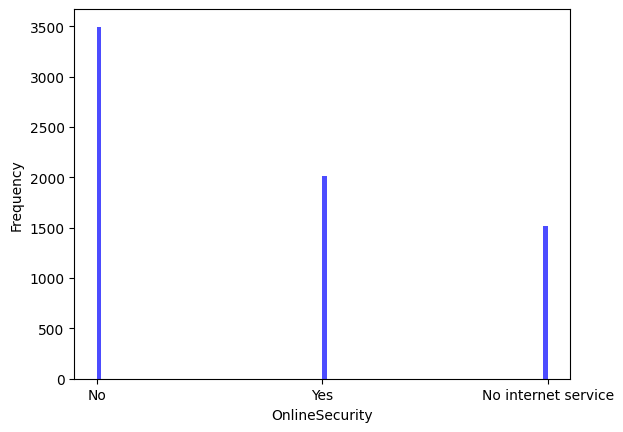

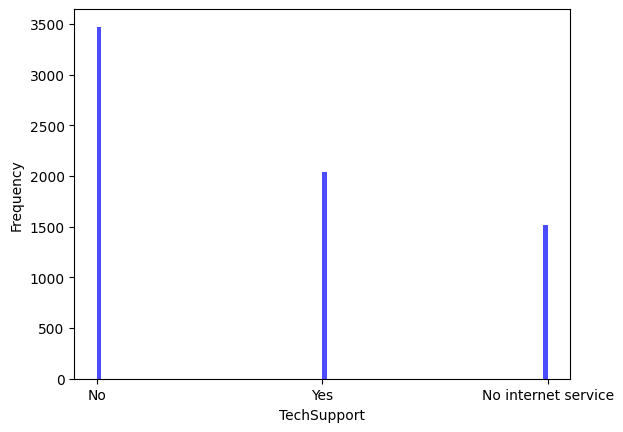

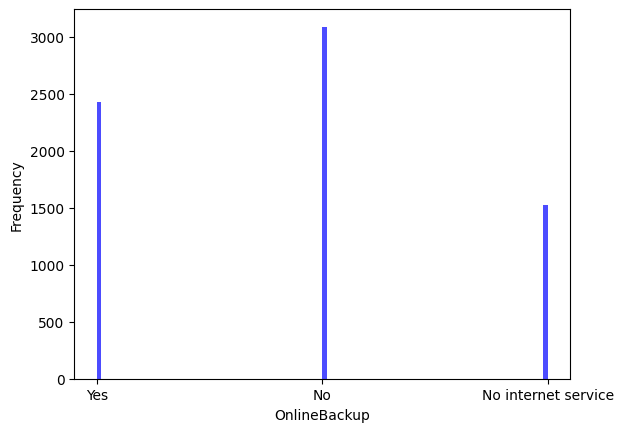

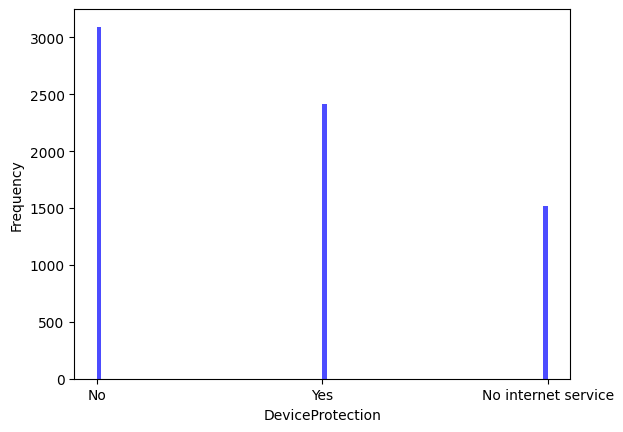

In [32]:
cols = ["OnlineSecurity", "TechSupport", "OnlineBackup", "DeviceProtection"]
for col in cols:
    plt.hist(pandas_df[col], bins=100, color='blue', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


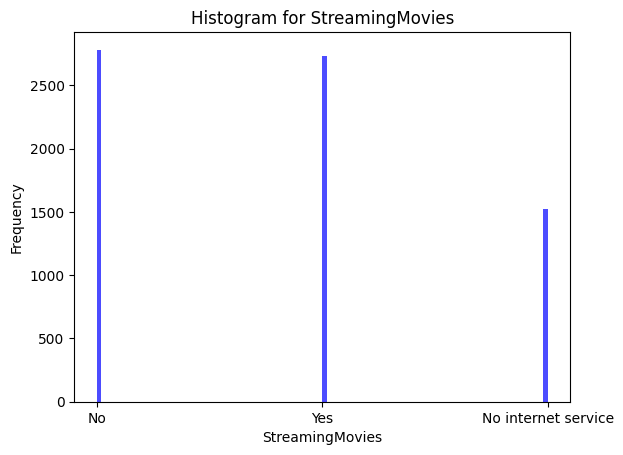

In [25]:
plt.hist(pandas_df['StreamingMovies'], bins=100, color='blue', alpha=0.7)
plt.title('Histogram for StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Frequency')
plt.show()


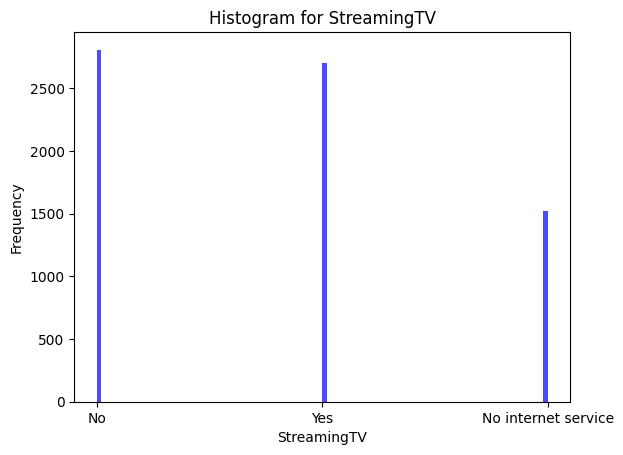

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(pandas_df['StreamingTV'], bins=100, color='blue', alpha=0.7)
plt.title('Histogram for StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Frequency')
plt.show()

### Удаляем признак StreamingMovies(потоковое вещание фильмов), так как он совпадает с StreamingTV(потоковое вещание ТВ) и TechSupport(техподдержкой) , так как она совпадает с OnlineSecurity(онлайн безопасность).

### Создаем новый признак("New_or_not") является ли клиент новым(до 12 мес), так как вероятность того, что новый клиент уйдет выше

In [55]:
from pyspark.sql.functions import when
df_no_null = df_no_null.withColumn("new_or_not", when(df_no_null["tenure"] <= 12, "Yes").otherwise("No"))

In [56]:
df_no_null.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+----------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|new_or_not|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+----------+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|

In [57]:
from pyspark.sql.functions import when
df_new = df_no_null.drop("CustomerID", "StreamingMovies", "TechSupport")

#7. Векторизация фичей
Подготовьте данные к обучению:


In [58]:
from pyspark import mllib
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline


In [59]:
text_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",  \
                "OnlineSecurity", "OnlineBackup", "DeviceProtection", "StreamingTV", \
                 "PaperlessBilling", "Churn","InternetService", "Contract", "new_or_not", "PaymentMethod" ]

indexers = [StringIndexer(inputCol=column, outputCol=column+"_index",).fit(df_new) for column in text_cols]
pipeline = Pipeline(stages=indexers)
new_dataframe = pipeline.fit(df_new).transform(df_new).drop(*text_cols)

In [44]:
new_dataframe.show(5)

+-------------+------+--------------+------------+----------+------------+-------------+----------------+------------------+-------------------+--------------------+------------------+----------------------+-----------------+----------------------+-----------+---------------------+--------------+-------------------+
|SeniorCitizen|tenure|MonthlyCharges|TotalCharges|new_or_not|gender_index|Partner_index|Dependents_index|PhoneService_index|MultipleLines_index|OnlineSecurity_index|OnlineBackup_index|DeviceProtection_index|StreamingTV_index|PaperlessBilling_index|Churn_index|InternetService_index|Contract_index|PaymentMethod_index|
+-------------+------+--------------+------------+----------+------------+-------------+----------------+------------------+-------------------+--------------------+------------------+----------------------+-----------------+----------------------+-----------+---------------------+--------------+-------------------+
|            0|     1|         29.85|       29

In [60]:
from pyspark.ml.feature import OneHotEncoder


In [61]:
features_inp  = ["MultipleLines_index", "InternetService_index", "Contract_index", "PaymentMethod_index",\
                 "OnlineSecurity_index", "OnlineBackup_index", "DeviceProtection_index",  "StreamingTV_index", \
                ]

features_out = [ "MultipleLines_new","InternetService_new", "Contract_new", "PaymentMethod_new", \
                "OnlineSecurity_new", "OnlineBackup_new", "DeviceProtection_new", "StreamingTV_new"]

encoder = OneHotEncoder(inputCols = features_inp, outputCols = features_out) #Cоздадим объект encoder

In [62]:
fitted_encoder = encoder.fit(new_dataframe)
new_df = fitted_encoder.transform(new_dataframe).drop(*features_inp)

In [63]:
new_df.show(5)

+-------------+------+--------------+------------+------------+-------------+----------------+------------------+----------------------+-----------+----------------+-----------------+-------------------+-------------+-----------------+------------------+----------------+--------------------+---------------+
|SeniorCitizen|tenure|MonthlyCharges|TotalCharges|gender_index|Partner_index|Dependents_index|PhoneService_index|PaperlessBilling_index|Churn_index|new_or_not_index|MultipleLines_new|InternetService_new| Contract_new|PaymentMethod_new|OnlineSecurity_new|OnlineBackup_new|DeviceProtection_new|StreamingTV_new|
+-------------+------+--------------+------------+------------+-------------+----------------+------------------+----------------------+-----------+----------------+-----------------+-------------------+-------------+-----------------+------------------+----------------+--------------------+---------------+
|            0|     1|         29.85|       29.85|         1.0|          

In [64]:
from pyspark.ml.feature import VectorAssembler

In [65]:
features = list(new_df.drop("Churn_index").columns) #Список колонок фичей

target = "Churn_index" #Колонка «таргет»

In [66]:
vectorizer = VectorAssembler(inputCols = features, outputCol = "features_vec")
#Создаём переменную vectorizer — объект класса VectorAssembler, цель которого — превратить колонки с фичами в векторы

new_df_vectorised = vectorizer.transform(new_df)
#Трансформируем при помощи vectorizer наш датафрейм и сохраним его в переменную realty_vectorised

In [67]:
new_df_vectorised.select("features_vec","Churn_index").show(5,100)

+----------------------------------------------------------------------------------------------------+-----------+
|                                                                                        features_vec|Churn_index|
+----------------------------------------------------------------------------------------------------+-----------+
|(27,[1,2,3,4,5,7,9,13,14,16,19,22,23,25],[1.0,29.85,29.85,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0...|        0.0|
|             (27,[1,2,3,8,10,13,17,20,21,24,25],[34.0,56.95,1889.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|        0.0|
|       (27,[1,2,3,9,10,13,14,17,20,22,23,25],[2.0,53.85,108.15,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|        1.0|
|              (27,[1,2,3,7,8,13,18,20,21,24,25],[45.0,42.3,1840.75,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|        0.0|
|  (27,[1,2,3,4,9,10,12,14,16,19,21,23,25],[2.0,70.7,151.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0])|        1.0|
+-------------------------------------------------------------------------------

#8. Создание и обучение модели

1. Создайте модель — логистическую регрессию (используя LogisticRegression). В качестве параметров класса LogisticRegression укажите колонку фичей (параметр featuresCol), колонку-таргет (параметр labelCol) из датафрейма и имя колонки, в которую будут записываться предсказания (параметр predictionCol).

In [68]:
from pyspark.ml.classification import LogisticRegression
model = LogisticRegression(featuresCol = 'features_vec', labelCol = target, predictionCol = 'predicts')
#Создаём объект model — экземпляр класса LinearRegression

In [69]:
df_train, df_test = new_df_vectorised.randomSplit([0.8, 0.2])

In [70]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator

In [71]:
grid = ParamGridBuilder().addGrid(model.maxIter, [10, 15, 20]).addGrid(model.regParam, [0.5, 5]).addGrid(model.elasticNetParam, [0.01, 0.1]).addGrid(model.threshold, [0.1, 0.3, 0.5, 0.7, 0.9]).build()


In [72]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
eval = BinaryClassificationEvaluator(rawPredictionCol='predicts', labelCol = target)
#Столбец с предсказаниями будет иметь имя 'predicts'

In [73]:
from pyspark.ml.tuning import CrossValidator
cv = CrossValidator(estimator = model, estimatorParamMaps = grid, evaluator = eval) #Создаём объект cv — экземпляр CrossValidator
cv_model = cv.fit(df_train) #Используем метод fit для обучения модели, скормив ему обучающую выборку

# 9. Выбор лучшей модели

In [74]:
best_model = cv_model.bestModel
best_model.extractParamMap()

{Param(parent='LogisticRegression_e8d0ffb023af', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2,
 Param(parent='LogisticRegression_e8d0ffb023af', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.01,
 Param(parent='LogisticRegression_e8d0ffb023af', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto',
 Param(parent='LogisticRegression_e8d0ffb023af', name='featuresCol', doc='features column name.'): 'features_vec',
 Param(parent='LogisticRegression_e8d0ffb023af', name='fitIntercept', doc='whether to fit an intercept term.'): True,
 Param(parent='LogisticRegression_e8d0ffb023af', name='labelCol', doc='label column name.'): 'Churn_index',
 Param(parent='LogisticRegression_e8d0ffb023af', name='maxBlockSizeInMB', doc='maximum memory 

In [75]:
preds_test = best_model.transform(df_test)

In [76]:
preds_test.show(5)

+-------------+------+--------------+------------+------------+-------------+----------------+------------------+----------------------+-----------+----------------+-----------------+-------------------+-------------+-----------------+------------------+----------------+--------------------+---------------+--------------------+--------------------+--------------------+--------+
|SeniorCitizen|tenure|MonthlyCharges|TotalCharges|gender_index|Partner_index|Dependents_index|PhoneService_index|PaperlessBilling_index|Churn_index|new_or_not_index|MultipleLines_new|InternetService_new| Contract_new|PaymentMethod_new|OnlineSecurity_new|OnlineBackup_new|DeviceProtection_new|StreamingTV_new|        features_vec|       rawPrediction|         probability|predicts|
+-------------+------+--------------+------------+------------+-------------+----------------+------------------+----------------------+-----------+----------------+-----------------+-------------------+-------------+-----------------+---

In [77]:
eval.evaluate(preds_test)

0.7670407695831425

#10. Обратная связь
Вы ознакомились с возможностями двух мощных библиотек: PySpark SQL для предобработки данных и PySpark ML для машинного обучения.
Поделитесь впечатлениями от работы с новыми библиотеками. В чём они более удобны, чем уже знакомые вам Pandas и Sklearn, а в чём нет.

### На самом деле сложно оценить работу библиотеки, которую видишь в первый раз, на одном примере. Есть моменты котроые нужно запомнить и привыкнуть, pandas и sklearn уже привычны, поэтому кажутся удобнее. Полагаю, что  библиотеки PySpark SQL и PySpark ML намного быстрее работают с большим количеством данных(но в этой работе у нас датафрейм всего на 7к строк, поэтому не удалось оценить скорость). На мой взгляд, на эти библиотеки должно быть больше практики, чтобы понять и оценить их плюсы.